In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

Using TensorFlow backend.


In [3]:
data = pd.read_csv('.\data\AMZN.csv',
                  header=0,
                  usecols=['Date', 'Close'],
                  parse_dates=True,
                  index_col='Date')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4778 entries, 2000-09-05 to 2019-09-03
Data columns (total 1 columns):
Close    4778 non-null float64
dtypes: float64(1)
memory usage: 74.7 KB


In [5]:
data.head()

,Close
Date,
2000-09-05,45.6875
2000-09-06,45.8750
2000-09-07,43.5000
2000-09-08,42.9375
2000-09-11,42.3750


In [7]:
data.describe()

,Close
count,4778.000000
mean,347.354770
std,493.947565
min,5.970000
25%,40.102499
50%,125.889999
75%,372.090004
max,2039.510010


C:\Users\Patryk\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


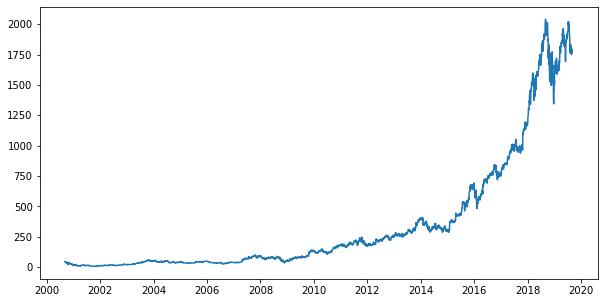

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(data)

In [11]:
dataPCh = data.pct_change()

In [12]:
log_returns = np.log(1 + dataPCh)

In [13]:
log_returns.tail(10)

,Close
Date,
2019-08-20,-0.008149
2019-08-21,0.012227
2019-08-22,-0.010407
2019-08-23,-0.030974
2019-08-26,0.010942
2019-08-27,-0.003988
2019-08-28,0.001373
2019-08-29,0.012477
2019-08-30,-0.005675


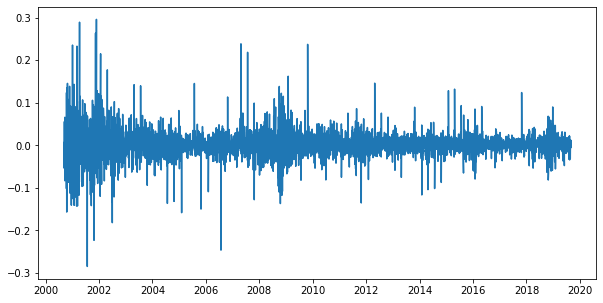

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(log_returns)

In [17]:
scaler = MinMaxScaler()

In [18]:
scaled_data = scaler.fit_transform(data)

In [19]:
train_length = int(len(scaled_data) * 0.7)
test_length = len(scaled_data) - train_length

In [21]:
train_data = scaled_data[0:train_length,:]
test_data = scaled_data[train_length:len(scaled_data),:]

In [24]:
len(train_data), len(test_data)

(3344, 1434)

In [23]:
def dataset_creation(dataset, timestep = 1):
    data_x, data_y = [], []
    for i in range(len(dataset)-timestep - 1):
        a = dataset[i:(i + timestep), 0]
        data_x.append(a)
        data_y.append(dataset[i + timestep, 0])
    return np.array(data_x), np.array(data_y)

In [25]:
timestep = 1
train_x, train_y = dataset_creation(train_data, timestep)
test_x, test_y = dataset_creation(test_data, timestep)

In [29]:
train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
test_x = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))

In [31]:
model = Sequential()

W0922 16:29:18.897644 10428 deprecation_wrapper.py:119] From C:\Users\Patryk\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [32]:
model.add(LSTM(256, input_shape=(1, timestep)))

W0922 16:31:48.766103 10428 deprecation_wrapper.py:119] From C:\Users\Patryk\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0922 16:31:48.779572 10428 deprecation_wrapper.py:119] From C:\Users\Patryk\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [33]:
model.add(Dense(1, activation='sigmoid'))

In [35]:
model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['accuracy'])

W0922 16:34:22.941384 10428 deprecation_wrapper.py:119] From C:\Users\Patryk\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [36]:
model.fit(train_x, train_y, epochs=100, batch_size=1, verbose=1)

W0922 16:35:45.658560 10428 deprecation.py:323] From C:\Users\Patryk\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0922 16:35:46.078440 10428 deprecation_wrapper.py:119] From C:\Users\Patryk\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0922 16:35:46.143235 10428 deprecation_wrapper.py:119] From C:\Users\Patryk\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/100
3342/3342 [==============================] - 17s 5ms/step - loss: 0.0048 - acc: 2.9922e-04
Epoch 2/100
3342/3342 [==============================] - 14s 4ms/step - loss: 1.6520e-04 - acc: 2.9922e-04
Epoch 3/100
3342/3342 [==============================] - 14s 4ms/step - loss: 1.5346e-04 - acc: 2.9922e-04
Epoch 4/100
3342/3342 [==============================] - 14s 4ms/step - loss: 1.4876e-04 - acc: 2.9922e-04
Epoch 5/100
3342/3342 [==============================] - 14s 4ms/step - loss: 1.3522e-04 - acc: 2.9922e-04
Epoch 6/100
3342/3342 [==============================] - 13s 4ms/step - loss: 1.3175e-04 - acc: 2.9922e-04
Epoch 7/100
3342/3342 [==============================] - 13s 4ms/step - loss: 1.2139e-04 - acc: 2.9922e-04
Epoch 8/100
3342/3342 [==============================] - 13s 4ms/step - loss: 1.1399e-04 - acc: 2.9922e-04
Epoch 9/100
3342/3342 [==============================] - 13s 4ms/step - loss: 1.0696e-04 - acc: 2.9922e-04
Epoch 10/100
3342/3342 [=================

Epoch 77/100
3342/3342 [==============================] - 13s 4ms/step - loss: 3.0369e-06 - acc: 2.9922e-04
Epoch 78/100
3342/3342 [==============================] - 13s 4ms/step - loss: 2.8242e-06 - acc: 2.9922e-04
Epoch 79/100
3342/3342 [==============================] - 13s 4ms/step - loss: 2.7055e-06 - acc: 2.9922e-04
Epoch 80/100
3342/3342 [==============================] - 13s 4ms/step - loss: 2.7856e-06 - acc: 2.9922e-04
Epoch 81/100
3342/3342 [==============================] - 13s 4ms/step - loss: 2.8450e-06 - acc: 2.9922e-04
Epoch 82/100
3342/3342 [==============================] - 13s 4ms/step - loss: 2.8777e-06 - acc: 2.9922e-04
Epoch 83/100
3342/3342 [==============================] - 13s 4ms/step - loss: 2.7161e-06 - acc: 2.9922e-04
Epoch 84/100
3342/3342 [==============================] - 13s 4ms/step - loss: 2.5750e-06 - acc: 2.9922e-04
Epoch 85/100
3342/3342 [==============================] - 13s 4ms/step - loss: 2.5562e-06 - acc: 2.9922e-04
Epoch 86/100
3342/3342 [====

In [38]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________


In [39]:
score = model.evaluate(train_x, train_y, verbose=0)
print('Keras Model Loss = ', score[0])
print('Keras Model Accuracy = ', score[1])

Keras Model Loss =  2.8752109076361547e-06
Keras Model Accuracy =  0.0002992220227408737


In [40]:
train_prediction = model.predict(train_x)
test_prediction = model.predict(test_x)

In [41]:
final_train_prediction = scaler.inverse_transform(train_prediction)
final_train_y = scaler.inverse_transform([train_y])
final_test_prediction = scaler.inverse_transform(test_prediction)
final_test_y = scaler.inverse_transform([test_y])

In [42]:
train_prediction_plot = np.empty_like(scaled_data)
train_prediction_plot[:,:] = np.nan
train_prediction_plot[1:len(final_train_prediction)+1, :] = final_train_prediction

In [43]:
test_prediction_plot = np.empty_like(scaled_data)
test_prediction_plot[:,:] = np.nan
test_prediction_plot[len(final_train_prediction) + (1*2) + 1: len(scaled_data) - 1, :] = final_test_prediction

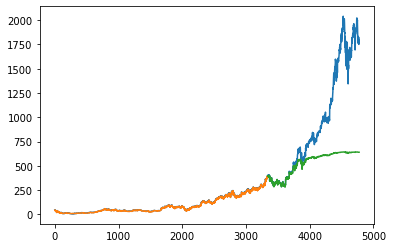

In [44]:
plt.plot(scaler.inverse_transform(scaled_data))
plt.plot(train_prediction_plot)
plt.plot(test_prediction_plot)
plt.show()